In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

C:\Users\vj260\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\vj260\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [52]:
data = pd.read_csv("file_name.csv")
data

,Text,Language
0,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
1,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam
2,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam
3,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam
4,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam
...,...,...
2027,ఇప్పుడూ సాగుతున్నాయి.,Telugu
2028,కానీ అతడు సరిగ్గా వినియోగించుకోలేదు.,Telugu
2029,స్థానికులు తీవ్ర భయభ్రాంతులకు లోనయ్యారు.,Telugu
2030,అంతేకాకుండా వివిధ రకాల ప్రయోజనాలు అందుకుంటారు.,Telugu


In [53]:
#data = pd.read_csv('sh_data.csv')
#data.sample(5).head(5)

In [36]:
#data = data.drop(['Unnamed: 0'], axis = 1)

In [54]:
data = data.sample(frac = 1)
data

,Text,Language
112,വിവിധ രാഷ്ട്രീയ പ്രശ്നങ്ങളെ കുറിച്ചുള്ള ലേഖനങ്...,Malayalam
464,നിങ്ങൾ തലയിൽ ആണി അടിച്ചു.,Malayalam
1560,ఈ మ‌ధ్యే విడుద‌లైన చిత్ర ట్రైల‌ర్ ఆడియోకు ప్రే...,Telugu
1960,వీరిని స్థానికులు ఆసుపత్రికి తరలించారు.,Telugu
1327,"ನಾನು ಎಲ್ಲಾ ವಾರಾಂತ್ಯದಲ್ಲಿ ಮುಕ್ತನಾಗಿದ್ದೇನೆ, ಏನಾದ...",Kannada
...,...,...
1294,ಪ್ರಶ್ನೆಯನ್ನು ತಪ್ಪಿಸುವುದು.,Kannada
2013,"అయితే, ఉల్లంఘించినందుకు జరిమానా విధించాలా?",Telugu
1518,అంతేకాదన్నా!,Telugu
713,கேட்ச் -22 என்ற வார்த்தையைப் பயன்படுத்த.,Tamil


In [55]:
X = data['Text']
X.sample(5)

794                                          இது நல்லது.
767    தொடங்குவதற்கு இது சிறந்த வீடியோ, எனவே ஆங்கிலத்...
492    എനിക്ക് എന്തെങ്കിലും ചെയ്യാൻ ഇഷ്ടമാണ്, പക്ഷെ എ...
261    അവന്റെ യാത്രയ്ക്കിടയിലോ ഒരു അഭിമുഖത്തിലോ അവൻ ന...
959            நிச்சயமாக, உங்கள் மனதில் என்ன இருக்கிறது?
Name: Text, dtype: object

In [56]:
y = data['Language']
y.sample(5)

1403      Kannada
191     Malayalam
1187      Kannada
888         Tamil
221     Malayalam
Name: Language, dtype: object

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [58]:
vec = TfidfVectorizer(ngram_range=(1,3),analyzer='char') 
        #TfidfVectorizer

In [59]:
'''
model = pipeline.Pipeline([
    ('vectorizer',vec),
    ('clf', LogisticRegression())
])
'''
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

C:\Users\vj260\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vj260\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [61]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
accuracy

1.0

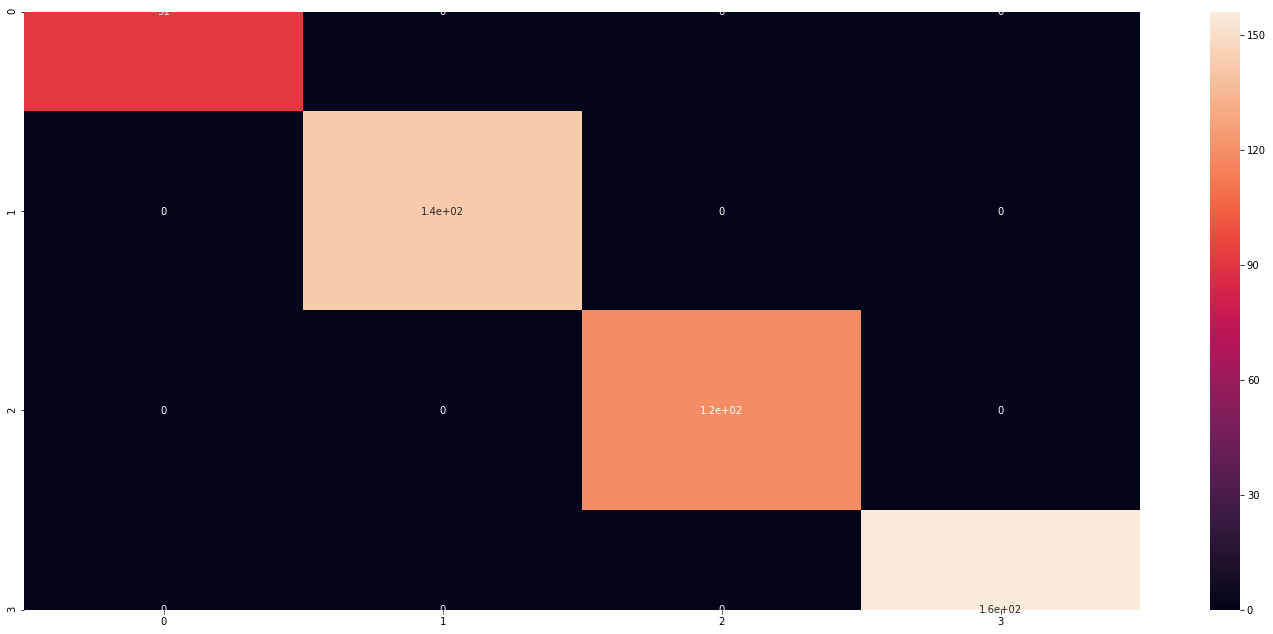

In [71]:
plt.figure(figsize=(25,11))
sns.heatmap(cm,annot=True)
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Kannada       1.00      1.00      1.00        91
   Malayalam       1.00      1.00      1.00       142
       Tamil       1.00      1.00      1.00       119
      Telugu       1.00      1.00      1.00       156

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508



In [64]:
def pred(t):
    l = model.predict([t])
    print('Language is:',l)

In [65]:
pred("సమానులును నగుదురు. వారు వివేచన-అంతఃకరణ")

Language is: ['Telugu']


In [66]:
pred("ಬೆಳಗ್ಗೆ")

Language is: ['Kannada']


In [67]:
pred("உங்களை சந்தித்ததில் மகிழ்ச்சி")

Language is: ['Tamil']


In [68]:
pred("ഇന്ന് നിങ്ങൾക്കെങ്ങനെയുണ്ട്")

Language is: ['Malayalam']
